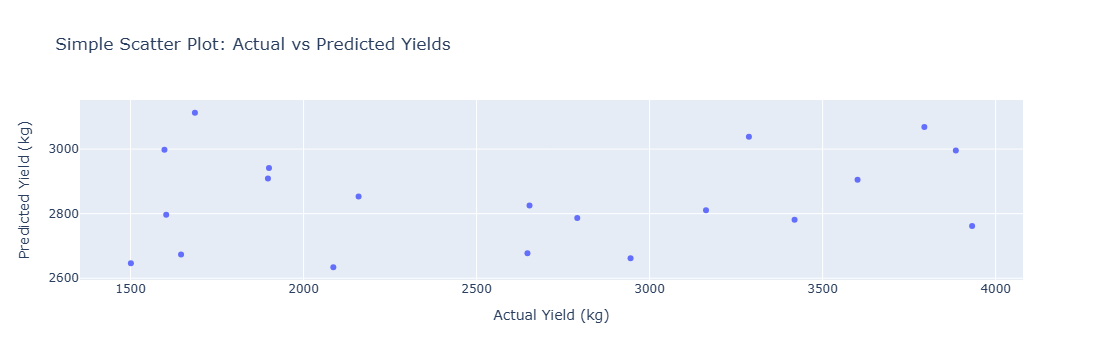

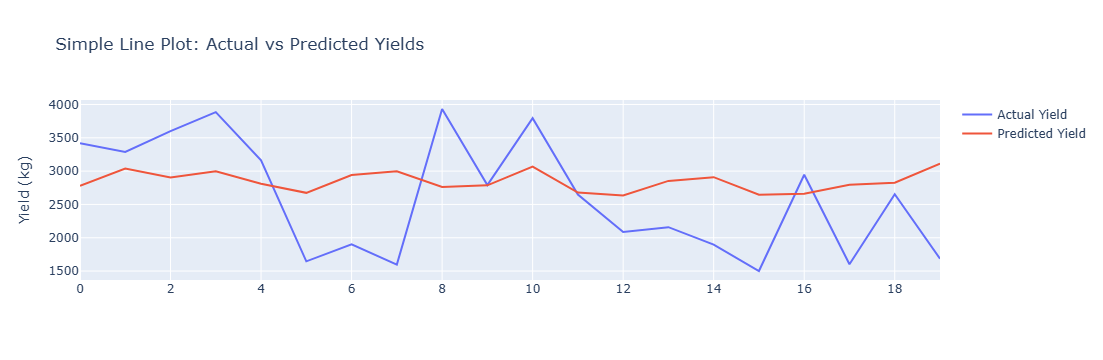

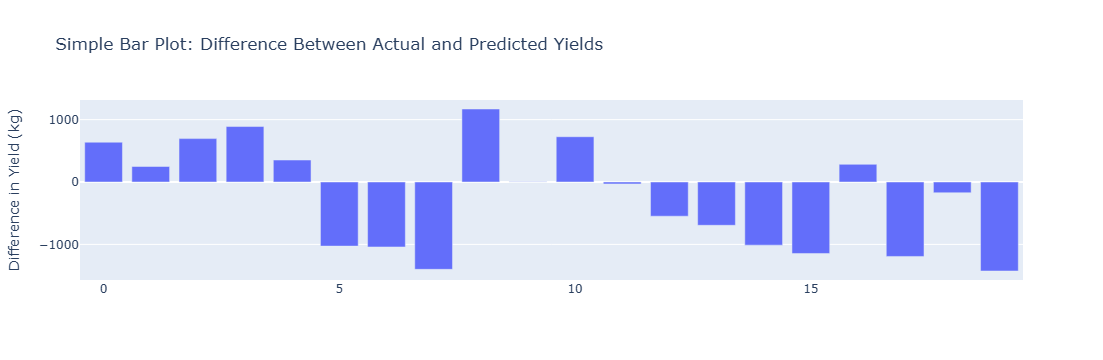

In [21]:
import pandas as p
from sklearn.linear_model import LinearRegression as L
from sklearn.model_selection import train_test_split as t
import plotly.express as px
import plotly.graph_objects as go
d = p.read_csv('Crop_recommendationV2.csv')
X = d[['Rainfall (mm)', 'Temperature (°C)']]  
y = d['Yield (kg)'] 
X_train, X_test, y_train, y_test = t(X, y, test_size=0.2, random_state=42)
m = L()
m.fit(X_train, y_train)
p = m.predict(X_test)
s = px.scatter(x=y_test, y=p, labels={'x': 'Actual Yield (kg)', 'y': 'Predicted Yield (kg)'},title='Simple Scatter Plot: Actual vs Predicted Yields')
s.show()
l = go.Figure()
l.add_trace(go.Scatter(x=list(range(len(y_test))), y=y_test, mode='lines', name='Actual Yield'))
l.add_trace(go.Scatter(x=list(range(len(p))), y=p, mode='lines', name='Predicted Yield'))

l.update_layout(
    title='Simple Line Plot: Actual vs Predicted Yields',
    xaxis_title='',
    yaxis_title='Yield (kg)'
)
l.show()
d = y_test - p
b = px.bar(
    x=list(range(len(d))),
    y=d,
    labels={'x': '', 'y': 'Difference in Yield (kg)'},
    title='Simple Bar Plot: Difference Between Actual and Predicted Yields'
)
b.show()
